In [19]:
from PIL import Image, ImageDraw, ImageFont
from fontTools.ttLib import TTFont
import numpy as np
import re
import os
import math
from database.fonts.collect_fonts_script import FONTS_DATA

In [20]:
font_file_path = "test_font.ttf"
font_size = 72
zoom_rate = 1
background_color = (255,255,255)
char_code = 0x0025
font_color = (0,0,0)

In [21]:
FONTS_DATA

'/home/wuming/Documents/abstract-meme/database/fonts/collected_fonts/'

In [22]:
match_pattern = r"([^\/]+)\.ttf$"

In [23]:
font_name = re.search(match_pattern, font_file_path).group(1)

In [24]:
font_name

'test_font'

In [25]:
font = ImageFont.truetype(font_file_path,font_size)
loaded_font = TTFont(font_file_path)

In [26]:
location_collection = font.getbbox(text=chr(char_code))
char_width = location_collection[2] - location_collection[0]
char_height = location_collection[3] - location_collection[1]

In [30]:
part_image_frame_one_side = 50 
part_image_frame = (math.ceil(part_image_frame_one_side*zoom_rate), math.ceil(part_image_frame_one_side*zoom_rate))
part_image = Image.new("RGB", part_image_frame, color=background_color)
part_draw = ImageDraw.Draw(part_image)
part_draw_anchor = (int(part_image_frame_one_side/2), int(part_image_frame_one_side/2))
part_draw.text(part_draw_anchor,text=chr(char_code), font=font, anchor="mm", fill=font_color)

In [31]:
part_draw

In [33]:
part_image.save("check-graph.png", "PNG")

In [34]:
part_draw

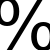

In [35]:
part_image

In [37]:
image_np = np.asarray(part_image)

In [38]:
image_np[0]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [129, 129, 129],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [207, 207, 207],
       [  3,   3,   3],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  3,   3

In [40]:
import matplotlib.pyplot as plt

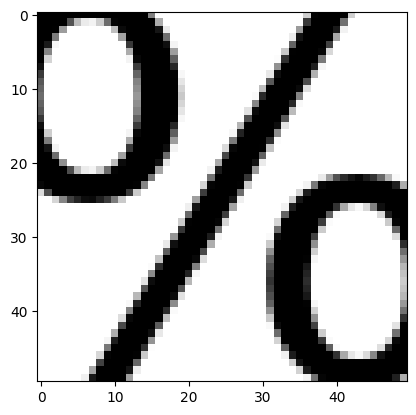

In [41]:
plt.imshow(image_np)

In [53]:
def touch_edge(image, detect_color = (0,0,0), edge_width:int = 1 ):
    detected = False
    image_np = np.asarray(image)

    if edge_width >= 1:

        for i in range(0,edge_width):
            detected = bool(detected + np.isin(detect_color, image_np[i]).any())
            detected = bool(detected + np.isin(detect_color, image_np[:][i]).any())
        
        for i in range(-edge_width, 0):
            detected = bool(detected + np.isin(detect_color, image_np[i]).any())
            detected = bool(detected + np.isin(detect_color, image_np[:][i]).any())

        pass
    else:
        raise ValueError
        pass
    return detected

In [54]:
result = touch_edge(part_image)

In [55]:
result

True

In [59]:
new_font = font.font_variant(size = font_size)

In [60]:
while touch_edge(part_image, edge_width= 5):

    font_size -= 2
    new_font = new_font.font_variant(size = font_size)

    part_image_frame = (math.ceil(part_image_frame_one_side*zoom_rate), math.ceil(part_image_frame_one_side*zoom_rate))
    part_image = Image.new("RGB", part_image_frame, color=background_color)
    part_draw = ImageDraw.Draw(part_image)
    part_draw_anchor = (int(part_image_frame_one_side/2), int(part_image_frame_one_side/2))
    part_draw.text(part_draw_anchor,text=chr(char_code), font=new_font, anchor="mm", fill=font_color)
    

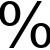

In [62]:
part_image